# Project: Insurance Policy Cancellation (DS)
---------------------------------------------

*This dataset comes from the 2022 NESS Statathon (Theme 1) from 2022. An archived version of the website and related data has been posted on HuskyCT.*

**Challenge:** Using historical policy data, create a multiclass predictive model to predict the policies that are most likely to be canceled and those most likely to be renewed, as well as understand what variables are most influential in causing a policy cancellation. 

For this theme, there are true answers, and a team should focus on proposing the best predictive model. The performance of a team will be mainly based on the predictive performance of the propose method measured by accuracy and the quality of the code. You can use Python's weighted F1 score to calculate the performance of for your model on the test partition.
  * Make sure you use the 'weighted' F1 score
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** 

In [5]:
# https://drive.google.com/file/d/1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr/view?usp=share_link
# https://drive.google.com/file/d/1k8asF0dptYNn1DFkylSEpr0D9FstpIO4/view?usp=share_link
# https://drive.google.com/file/d/1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n/view?usp=share_link
# https://drive.google.com/file/d/1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG/view?usp=share_link

!gdown 1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
!gdown 1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
!gdown 1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n
!gdown 1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG

Downloading...
From: https://drive.google.com/uc?id=1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
To: /content/X_test.csv
100% 31.5M/31.5M [00:00<00:00, 73.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
To: /content/X_train.csv
100% 63.9M/63.9M [00:00<00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n
To: /content/y_test.csv
100% 690k/690k [00:00<00:00, 154MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG
To: /content/y_train.csv
100% 1.40M/1.40M [00:00<00:00, 9.87MB/s]


In [6]:
!gdown 14-Mw8S_oEg2MhbIkB1j_FAnSwQOEOHF6
!gdown 1M_bC8pnGxpg7mfp4yKdyAqoC3qgv49Bo

#https://drive.google.com/file/d/14-Mw8S_oEg2MhbIkB1j_FAnSwQOEOHF6/view?usp=share_link
#https://drive.google.com/file/d/1M_bC8pnGxpg7mfp4yKdyAqoC3qgv49Bo/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=14-Mw8S_oEg2MhbIkB1j_FAnSwQOEOHF6
To: /content/test_df.csv
100% 32.2M/32.2M [00:00<00:00, 47.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M_bC8pnGxpg7mfp4yKdyAqoC3qgv49Bo
To: /content/train_df.csv
100% 65.3M/65.3M [00:01<00:00, 46.5MB/s]


##Import the Modules and load data


In [7]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for classification modeling
from sklearn.linear_model import LogisticRegression # LR
from sklearn.tree import DecisionTreeClassifier # DTC
from sklearn.ensemble import RandomForestClassifier # RFC
from sklearn.ensemble import GradientBoostingClassifier #GBC

# Classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
# Read the dataframe and store
train_df=pd.read_csv('train_df.csv')
test_df=pd.read_csv('test_df.csv')

In [9]:
# Check for the variables in the dataframe
train_df.head()

,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,cancel
0,942391,2013,15056.0,yellow,55.0,15.0,high,A,House,935.554116,Phone,F,1.0,1.0,1.0,14.0,0.0,0
1,2792,2014,80014.0,red,60.0,17.0,medium,A,House,835.804218,Phone,F,1.0,1.0,1.0,17.0,0.0,0
2,282556,2014,85002.0,white,48.0,15.0,high,A,Condo,958.488416,Broker,M,1.0,1.0,0.0,11.0,1.0,0
3,738330,2014,85051.0,red,57.0,15.0,high,A,House,963.496010,Phone,F,1.0,2.0,1.0,19.0,0.0,0
4,243724,2013,85077.0,white,42.0,16.0,high,B,House,803.088375,Broker,F,1.0,2.0,2.0,12.0,0.0,0


In [10]:
test_df.head()

,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,cancel
0,812304,2013,50020.0,white,33.0,16.0,high,C,House,796.385532,Broker,F,1.0,1.0,3.0,2.0,1.0,0
1,304035,2013,80002.0,red,56.0,10.0,high,A,House,773.232687,Broker,M,1.0,2.0,0.0,14.0,0.0,0
2,88142,2015,85005.0,white,46.0,12.0,high,C,Condo,943.047142,Broker,F,1.0,2.0,2.0,9.0,0.0,0
3,224693,2015,98026.0,blue,45.0,15.0,high,A,Tenant,949.368847,Broker,M,1.0,1.0,3.0,12.0,0.0,0
4,199182,2014,50022.0,white,28.0,19.0,low,C,Tenant,875.873613,Broker,F,1.0,1.0,1.0,7.0,1.0,2


## 1. EDA, data cleaning and feature engineering 

In [11]:
# See the data types and data quantities 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700232 entries, 0 to 700231
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 700232 non-null  int64  
 1   year               700232 non-null  int64  
 2   zip.code           699601 non-null  float64
 3   house.color        699612 non-null  object 
 4   ni.age             699524 non-null  float64
 5   len.at.res         699567 non-null  float64
 6   credit             699616 non-null  object 
 7   coverage.type      699569 non-null  object 
 8   dwelling.type      699581 non-null  object 
 9   premium            699608 non-null  float64
 10  sales.channel      699536 non-null  object 
 11  ni.gender          699589 non-null  object 
 12  ni.marital.status  699585 non-null  float64
 13  n.adults           699626 non-null  float64
 14  n.children         699616 non-null  float64
 15  tenure             699577 non-null  float64
 16  cl

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344891 entries, 0 to 344890
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 344891 non-null  int64  
 1   year               344891 non-null  int64  
 2   zip.code           344578 non-null  float64
 3   house.color        344572 non-null  object 
 4   ni.age             344598 non-null  float64
 5   len.at.res         344596 non-null  float64
 6   credit             344602 non-null  object 
 7   coverage.type      344575 non-null  object 
 8   dwelling.type      344552 non-null  object 
 9   premium            344560 non-null  float64
 10  sales.channel      344567 non-null  object 
 11  ni.gender          344577 non-null  object 
 12  ni.marital.status  344546 non-null  float64
 13  n.adults           344568 non-null  float64
 14  n.children         344572 non-null  float64
 15  tenure             344568 non-null  float64
 16  cl

We have 700,232 rows in the train dataset, and 344,890 rows in the test dataset

### Exploratory Data Analysis

#### Plots

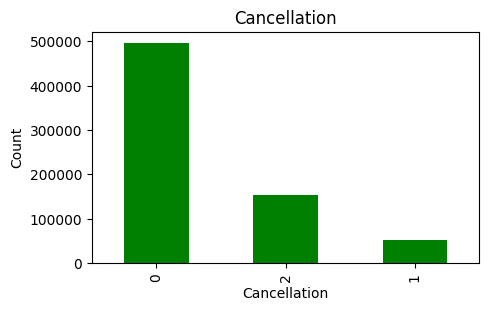

The number of values per each class:  
 0    496542
2    153180
1     50510
Name: cancel, dtype: int64


In [13]:
# Our target is cancellation, we can find the quantities are skewed. 
# cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel).'

train_df['cancel'].value_counts().plot.bar(color='green', title='Cancellation',  figsize=(5, 3))
plt.xlabel('Cancellation')
plt.ylabel('Count')
plt.show()

print('The number of values per each class: ','\n',train_df['cancel'].value_counts())


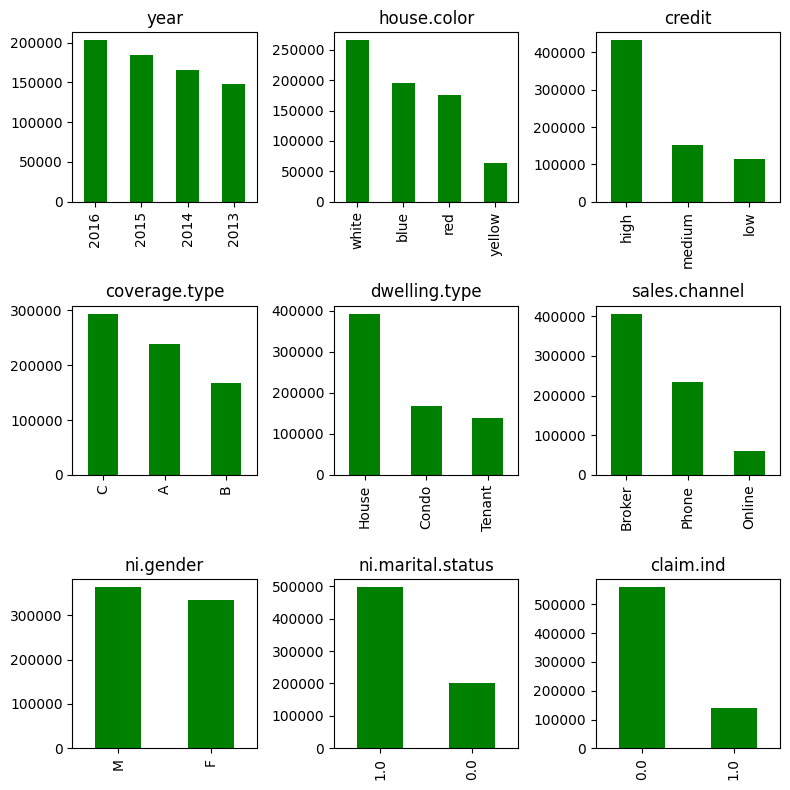

In [14]:
# Below plots are the distribution of categorical variables
import matplotlib.pyplot as plt

columns = list(train_df.columns)
categorical = ['year', 'house.color', 'credit', 'coverage.type', 'dwelling.type', 'sales.channel', 'ni.gender', 'ni.marital.status', 'claim.ind']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for ax, col in zip(axes.ravel(), categorical):
    train_df[col].value_counts().plot(kind='bar', ax=ax, title=col , color='green')

plt.tight_layout()
plt.show()

Except for the gender, most of dataset is skewed, not balanced 

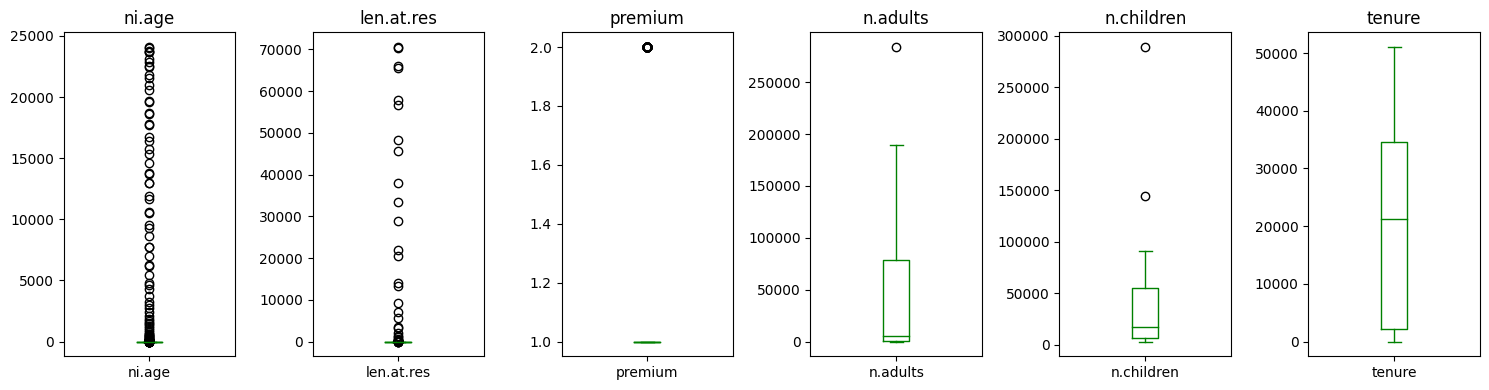

In [15]:
# In order to find the distribution of continuous variables, we used box plot. 
columns = list(train_df.columns)
continuous = ['ni.age','len.at.res','premium','n.adults','n.children','tenure']

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 4))

for ax, col in zip(axes.ravel(), continuous):
    train_df[col].value_counts().plot(kind='box', ax=ax, title=col, color='green')
    ax.set_title(col)

plt.tight_layout()
plt.show()

The boxplot shows that 'ni.age ' and 'len.at.res' are not concentrated, and the distribution of values is spread out. Apart from the two values, others are not skewed. 

In [16]:
for col in train_df.columns:
    print(train_df[col].value_counts(),'\n')

942391    1
715939    1
295961    1
392834    1
985119    1
         ..
788774    1
572671    1
622177    1
434161    1
122363    1
Name: id, Length: 700232, dtype: int64 

2016    202799
2015    183960
2014    165149
2013    148324
Name: year, dtype: int64 

50047.0    12556
50054.0     9985
50025.0     9454
50021.0     9315
80022.0     9150
           ...  
20137.0      404
20146.0      395
20115.0      392
20142.0      372
20108.0      360
Name: zip.code, Length: 310, dtype: int64 

white     265627
blue      195884
red       175163
yellow     62938
Name: house.color, dtype: int64 

42.000000     24091
41.000000     24042
40.000000     23805
44.000000     23723
43.000000     23679
              ...  
112.435541        1
168.789224        1
294.802686        1
275.103423        1
225.541394        1
Name: ni.age, Length: 478, dtype: int64 

14.000000    70535
15.000000    70266
16.000000    65881
13.000000    65539
17.000000    57874
             ...  
34.293375        1
34.321714   

#### Imputing Missing Values

Exlore the missing values, drop the meaningless variable, Impute the missing values

In [17]:
#Missing values in Training Dataset
train_df.isna().sum()

id                     0
year                   0
zip.code             631
house.color          620
ni.age               708
len.at.res           665
credit               616
coverage.type        663
dwelling.type        651
premium              624
sales.channel        696
ni.gender            643
ni.marital.status    647
n.adults             606
n.children           616
tenure               655
claim.ind            658
cancel                 0
dtype: int64

In [18]:
#Impute the missing value with mean 
train_df = train_df.fillna(train_df.mean())

<ipython-input-18-5ccf6c3a7422>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df = train_df.fillna(train_df.mean())


In this dataset, the number of missing values are less than 10%, we can impute the missing value with mean.

In [19]:
#Check for the remaining missing values after updating with mean 
train_df.isna().sum()

id                     0
year                   0
zip.code               0
house.color          620
ni.age                 0
len.at.res             0
credit               616
coverage.type        663
dwelling.type        651
premium                0
sales.channel        696
ni.gender            643
ni.marital.status      0
n.adults               0
n.children             0
tenure                 0
claim.ind              0
cancel                 0
dtype: int64

In [20]:
#fill missing values of categorical variables with mode 
# When it comes to the categorical variable, it is difficult to find mean value. So, we imputed the missing values using mode 

mode = train_df['house.color'].mode()[0]
train_df['house.color'].fillna(mode, inplace=True)

mode = train_df['credit'].mode()[0]
train_df['credit'].fillna(mode, inplace=True)

mode = train_df['coverage.type'].mode()[0]
train_df['coverage.type'].fillna(mode, inplace=True)

mode = train_df['dwelling.type'].mode()[0]
train_df['dwelling.type'].fillna(mode, inplace=True)

mode = train_df['sales.channel'].mode()[0]
train_df['sales.channel'].fillna(mode, inplace=True)

mode = train_df['ni.gender'].mode()[0]
train_df['ni.gender'].fillna(mode, inplace=True)
# Check if all values are imputed and no missing values left
train_df.isna().sum()

id                   0
year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
cancel               0
dtype: int64

In [21]:
# Checked correlation among the numerical variables
corr = train_df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-21-b2c2af025c5c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr(method='spearman')


,id,year,zip.code,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind,cancel
id,1.000000,0.005083,0.000720,0.000173,-0.001085,0.001375,0.000673,0.001107,0.002615,0.000608,0.001265,0.000919
year,0.005083,1.000000,0.000915,-0.001393,-0.000747,0.000424,0.001035,-0.001189,0.000484,-0.002405,0.000544,-0.024226
zip.code,0.000720,0.000915,1.000000,-0.001541,-0.000617,0.000235,0.000276,0.000864,0.000390,-0.001407,-0.001149,0.030515
ni.age,0.000173,-0.001393,-0.001541,1.000000,0.001308,-0.000560,0.062853,-0.001762,0.084787,0.636953,0.002048,-0.104760
len.at.res,-0.001085,-0.000747,-0.000617,0.001308,1.000000,0.001465,-0.000818,-0.000528,-0.001257,-0.000633,0.000689,-0.039444
premium,0.001375,0.000424,0.000235,-0.000560,0.001465,1.000000,-0.000706,-0.000942,-0.001189,-0.001194,-0.000834,-0.027730
ni.marital.status,0.000673,0.001035,0.000276,0.062853,-0.000818,-0.000706,1.000000,0.000557,0.514076,0.037446,-0.001004,-0.026360
n.adults,0.001107,-0.001189,0.000864,-0.001762,-0.000528,-0.000942,0.000557,1.000000,-0.000785,-0.001448,-0.000487,0.039490
n.children,0.002615,0.000484,0.000390,0.084787,-0.001257,-0.001189,0.514076,-0.000785,1.000000,0.050359,-0.000176,0.062964
tenure,0.000608,-0.002405,-0.001407,0.636953,-0.000633,-0.001194,0.037446,-0.001448,0.050359,1.000000,0.000996,-0.025388


Our analysis indicates that 'ni.age' is most strongly correlated with the variable 'cancel', followed by 'claim.ind', 'n.children', and 'len.at.res'. Notably, 'ni.age' has a negative correlation with 'cancel', suggesting that older age is associated with fewer cancellations

#### test dataset cleaning 
Identifying and imputing missing values for test variables

In [22]:
#Check for missing values
test_df.isna().sum()

id                     0
year                   0
zip.code             313
house.color          319
ni.age               293
len.at.res           295
credit               289
coverage.type        316
dwelling.type        339
premium              331
sales.channel        324
ni.gender            314
ni.marital.status    345
n.adults             323
n.children           319
tenure               323
claim.ind            324
cancel                 0
dtype: int64

In [23]:
#Impute the missing value with mean 
test_df = test_df.fillna(test_df.mean())

<ipython-input-23-f03ce5624a50>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df = test_df.fillna(test_df.mean())


In [24]:
#check for missing values
test_df.isna().sum()

id                     0
year                   0
zip.code               0
house.color          319
ni.age                 0
len.at.res             0
credit               289
coverage.type        316
dwelling.type        339
premium                0
sales.channel        324
ni.gender            314
ni.marital.status      0
n.adults               0
n.children             0
tenure                 0
claim.ind              0
cancel                 0
dtype: int64

In [25]:
#fill other values with mode 
mode = test_df['house.color'].mode()[0]
test_df['house.color'].fillna(mode, inplace=True)

mode = test_df['credit'].mode()[0]
test_df['credit'].fillna(mode, inplace=True)

mode = test_df['coverage.type'].mode()[0]
test_df['coverage.type'].fillna(mode, inplace=True)

mode = test_df['dwelling.type'].mode()[0]
test_df['dwelling.type'].fillna(mode, inplace=True)

mode = test_df['sales.channel'].mode()[0]
test_df['sales.channel'].fillna(mode, inplace=True)

mode = test_df['ni.gender'].mode()[0]
test_df['ni.gender'].fillna(mode, inplace=True)
#Check if all variables are imputed prperly
test_df.isna().sum()

id                   0
year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
cancel               0
dtype: int64

In [26]:
# Check for shape of the Training dataset
print(train_df.shape)
train_df.head()

(700232, 18)


,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,cancel
0,942391,2013,15056.0,yellow,55.0,15.0,high,A,House,935.554116,Phone,F,1.0,1.0,1.0,14.0,0.0,0
1,2792,2014,80014.0,red,60.0,17.0,medium,A,House,835.804218,Phone,F,1.0,1.0,1.0,17.0,0.0,0
2,282556,2014,85002.0,white,48.0,15.0,high,A,Condo,958.488416,Broker,M,1.0,1.0,0.0,11.0,1.0,0
3,738330,2014,85051.0,red,57.0,15.0,high,A,House,963.496010,Phone,F,1.0,2.0,1.0,19.0,0.0,0
4,243724,2013,85077.0,white,42.0,16.0,high,B,House,803.088375,Broker,F,1.0,2.0,2.0,12.0,0.0,0


In [27]:
# Check for shape of test data
print(test_df.shape)

(344891, 18)


#### Dropping Columns

In [28]:
# To check if zip code can be dropped
unique_values = train_df['zip.code'].unique()

# get the number of unique values in the Series
print(len(unique_values))

311


In [29]:
#Dropping columns id and house.color from Training 
train_df.drop('id', inplace=True, axis=1)
train_df.drop('house.color', inplace=True, axis=1)

# Check if columns dropped properly
train_df.head()

# Check for the dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700232 entries, 0 to 700231
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               700232 non-null  int64  
 1   zip.code           700232 non-null  float64
 2   ni.age             700232 non-null  float64
 3   len.at.res         700232 non-null  float64
 4   credit             700232 non-null  object 
 5   coverage.type      700232 non-null  object 
 6   dwelling.type      700232 non-null  object 
 7   premium            700232 non-null  float64
 8   sales.channel      700232 non-null  object 
 9   ni.gender          700232 non-null  object 
 10  ni.marital.status  700232 non-null  float64
 11  n.adults           700232 non-null  float64
 12  n.children         700232 non-null  float64
 13  tenure             700232 non-null  float64
 14  claim.ind          700232 non-null  float64
 15  cancel             700232 non-null  int64  
dtypes:

In [30]:
#Dropping columns id and house.color from Test
test_df.drop('id', inplace=True, axis=1)
test_df.drop('house.color', inplace=True, axis=1)

# Check if columns dropped properly
test_df.head()

#Check for the dataset info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344891 entries, 0 to 344890
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               344891 non-null  int64  
 1   zip.code           344891 non-null  float64
 2   ni.age             344891 non-null  float64
 3   len.at.res         344891 non-null  float64
 4   credit             344891 non-null  object 
 5   coverage.type      344891 non-null  object 
 6   dwelling.type      344891 non-null  object 
 7   premium            344891 non-null  float64
 8   sales.channel      344891 non-null  object 
 9   ni.gender          344891 non-null  object 
 10  ni.marital.status  344891 non-null  float64
 11  n.adults           344891 non-null  float64
 12  n.children         344891 non-null  float64
 13  tenure             344891 non-null  float64
 14  claim.ind          344891 non-null  float64
 15  cancel             344891 non-null  int64  
dtypes:

As there are 310 values so zip is not unique. We cannot drop it

###Data Splitting

Spliting the data set 

In [31]:
# Train data splitting
y_train=train_df['cancel']
X_train=train_df.drop('cancel', axis=1)
y_train=pd.DataFrame(y_train)
print(X_train.shape, y_train.shape)


(700232, 15) (700232, 1)


In [32]:
# Test dataset splitting
y_test=test_df['cancel']
X_test=test_df.drop('cancel', axis=1)
y_test=pd.DataFrame(y_test)
print(X_test.shape, y_test.shape)

(344891, 15) (344891, 1)


###Variable Transformation

In [33]:
# Using label encoder change values to float and int
# To run the Sklearn and fit the model, we need to change the types of categirical variables. So we encoded the object types of data to numeric types of data. 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Convert Training dataset
X_train['credit'] = label_encoder.fit_transform(X_train['credit'])  
X_train['dwelling.type'] = label_encoder.fit_transform(X_train['dwelling.type'])
X_train['coverage.type'] = label_encoder.fit_transform(X_train['coverage.type'])
X_train['sales.channel'] = label_encoder.fit_transform(X_train['sales.channel']) 
X_train['ni.gender'] = label_encoder.fit_transform(X_train['ni.gender'])

In [34]:
#Using label encoder change values to float and int

# Convert Testing dataset
X_test['credit'] = label_encoder.fit_transform(X_test['credit'])
X_test['dwelling.type'] = label_encoder.fit_transform(X_test['dwelling.type'])
X_test['coverage.type'] = label_encoder.fit_transform(X_test['coverage.type'])
X_test['sales.channel'] = label_encoder.fit_transform(X_test['sales.channel'])
X_test['ni.gender'] = label_encoder.fit_transform(X_test['ni.gender'])


In [35]:
#Check if variables are transformed
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700232 entries, 0 to 700231
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               700232 non-null  int64  
 1   zip.code           700232 non-null  float64
 2   ni.age             700232 non-null  float64
 3   len.at.res         700232 non-null  float64
 4   credit             700232 non-null  int64  
 5   coverage.type      700232 non-null  int64  
 6   dwelling.type      700232 non-null  int64  
 7   premium            700232 non-null  float64
 8   sales.channel      700232 non-null  int64  
 9   ni.gender          700232 non-null  int64  
 10  ni.marital.status  700232 non-null  float64
 11  n.adults           700232 non-null  float64
 12  n.children         700232 non-null  float64
 13  tenure             700232 non-null  float64
 14  claim.ind          700232 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 80.1 MB
<clas

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700232, 15) (344891, 15) (700232, 1) (344891, 1)


In [37]:
#checking variable after transformation
X_train.head(10)

,year,zip.code,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,2013,15056.0,55.0,15.000000,0,0,1,935.554116,2,0,1.0,1.0,1.0,14.0,0.0
1,2014,80014.0,60.0,17.000000,2,0,1,835.804218,2,0,1.0,1.0,1.0,17.0,0.0
2,2014,85002.0,48.0,15.000000,0,0,0,958.488416,0,1,1.0,1.0,0.0,11.0,1.0
3,2014,85051.0,57.0,15.000000,0,0,1,963.496010,2,0,1.0,2.0,1.0,19.0,0.0
4,2013,85077.0,42.0,16.000000,0,1,1,803.088375,0,0,1.0,2.0,2.0,12.0,0.0
5,2013,50020.0,31.0,2.409664,0,1,2,884.245436,0,1,1.0,2.0,2.0,6.0,1.0
6,2014,15049.0,36.0,20.000000,0,2,0,1001.522320,2,0,1.0,3.0,1.0,10.0,0.0
7,2016,50058.0,51.0,16.000000,1,0,1,935.903701,0,1,0.0,3.0,0.0,15.0,1.0
8,2013,85072.0,37.0,14.000000,0,2,2,1041.835196,0,0,0.0,1.0,0.0,14.0,1.0
9,2016,50057.0,48.0,15.000000,1,0,1,946.578875,0,1,1.0,1.0,2.0,20.0,0.0


In [38]:
X_test.head(10)

,year,zip.code,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,2013,50020.0,33.0,16.000000,0,2,1,796.385532,0,0,1.0,1.0,3.0,2.0,1.0
1,2013,80002.0,56.0,10.000000,0,0,1,773.232687,0,1,1.0,2.0,0.0,14.0,0.0
2,2015,85005.0,46.0,12.000000,0,2,0,943.047142,0,0,1.0,2.0,2.0,9.0,0.0
3,2015,98026.0,45.0,15.000000,0,0,2,949.368847,0,1,1.0,1.0,3.0,12.0,0.0
4,2014,50022.0,28.0,19.000000,1,2,2,875.873613,0,0,1.0,1.0,1.0,7.0,1.0
5,2015,98001.0,54.0,14.000000,0,2,1,888.300599,2,0,0.0,2.0,0.0,14.0,1.0
6,2014,80028.0,38.0,13.000000,2,0,0,1011.257920,2,0,0.0,2.0,0.0,10.0,0.0
7,2013,80016.0,62.0,9.000000,0,0,1,795.613301,2,0,1.0,2.0,1.0,15.0,0.0
8,2014,80002.0,39.0,23.545986,2,1,2,914.537282,2,0,0.0,1.0,0.0,20.0,0.0
9,2013,85025.0,40.0,16.000000,0,0,1,833.086745,2,1,1.0,1.0,2.0,18.0,1.0


###Min/Max sampling

In [39]:
# convert these all to numpy arrays
# X_train = np.array(X_train)
# X_train = np.array(X_train)
#y_train = np.array(y_train)
#y_test = np.array(y_test)

In [40]:
# Select numerical variables
# For continuous variable, I used MinMax scaler to normalize the dataset and make the distribution of dataset stable. 
numeric_cols=['ni.age','len.at.res','premium','n.adults','n.children','tenure']

In [41]:
# Implement Transform and Fit transform to model
scaler = MinMaxScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [42]:
X_train.describe()

,year,zip.code,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
count,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000,700232.000000
mean,2014.630125,62382.344581,0.068815,0.290157,0.599633,1.080052,0.958537,0.461554,0.751932,0.520769,0.710736,0.103071,0.144959,0.353970,0.199133
std,1.111731,27972.463581,0.033257,0.093148,0.822299,0.868274,0.660705,0.124537,0.923980,0.499569,0.453212,0.113876,0.195153,0.179716,0.399161
min,2013.000000,15001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,50009.000000,0.045763,0.224501,0.000000,0.000000,1.000000,0.371831,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000
50%,2015.000000,80011.000000,0.067299,0.285728,0.000000,1.000000,1.000000,0.461444,0.000000,1.000000,1.000000,0.090909,0.083333,0.393939,0.000000
75%,2016.000000,85030.000000,0.088834,0.346956,1.000000,2.000000,1.000000,0.550504,2.000000,1.000000,1.000000,0.181818,0.250000,0.484848,0.000000
max,2016.000000,98038.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can find that all the continuous variables are scaled from 0 to 1, and categorical features are encoded to number. Year and zip.code are unique feature, so, did not converted the features. 

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700232 entries, 0 to 700231
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               700232 non-null  int64  
 1   zip.code           700232 non-null  float64
 2   ni.age             700232 non-null  float64
 3   len.at.res         700232 non-null  float64
 4   credit             700232 non-null  int64  
 5   coverage.type      700232 non-null  int64  
 6   dwelling.type      700232 non-null  int64  
 7   premium            700232 non-null  float64
 8   sales.channel      700232 non-null  int64  
 9   ni.gender          700232 non-null  int64  
 10  ni.marital.status  700232 non-null  float64
 11  n.adults           700232 non-null  float64
 12  n.children         700232 non-null  float64
 13  tenure             700232 non-null  float64
 14  claim.ind          700232 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 80.1 MB


### SMOTE for Balancing

In [44]:
# Perform Smote to make the dataset balance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from collections import Counter

random_state = 42

# transform the dataset
oversample = SMOTE(k_neighbors=9)

X_resample, y_resample = oversample.fit_resample(X_train, y_train)
counter = Counter(y_resample)
print(counter)

Counter({'cancel': 1})


In [45]:
# We can found that the number of target variables are changed and balanced. 
y_resample.value_counts()

cancel
0         496542
1         496542
2         496542
dtype: int64

In [46]:
X_resample

,year,zip.code,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,2013,15056.000000,0.099602,0.285728,0,0,1,0.518647,2,0,1.0,0.000000,0.083333,0.424242,0.00000
1,2014,80014.000000,0.113062,0.326547,2,0,1,0.358558,2,0,1.0,0.000000,0.083333,0.515152,0.00000
2,2014,85002.000000,0.080758,0.285728,0,0,0,0.555454,0,1,1.0,0.000000,0.000000,0.333333,1.00000
3,2014,85051.000000,0.104986,0.285728,0,0,1,0.563491,2,0,1.0,0.090909,0.083333,0.575758,0.00000
4,2013,85077.000000,0.064607,0.306138,0,1,1,0.306053,0,0,1.0,0.090909,0.166667,0.363636,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489621,2015,98022.000000,0.067243,0.297932,2,2,1,0.486501,0,0,0.0,0.121837,0.000000,0.453921,0.00000
1489622,2016,80036.768761,0.088583,0.295167,1,0,0,0.479298,2,1,1.0,0.160796,0.275524,0.438072,0.00000
1489623,2014,50037.000000,0.101665,0.432222,2,0,1,0.546715,2,0,1.0,0.149745,0.514608,0.472387,0.35281
1489624,2013,98004.000000,0.057117,0.289721,1,0,2,0.600734,1,0,1.0,0.199933,0.216484,0.461027,0.00000


## 2. Modeling 


To find the model with best accuracy, I tried multiple ML model: Random Forest Classification(RFC), Decision Tree Classification (DTC), Gradiant Boosting Classification (GBC) and Logistics Regression(LR). 

### Random Forest Classifier 

In [47]:
#Fit the model using Random Forest Classifier
RFC= RandomForestClassifier()
RFC = RFC.fit(X_resample, y_resample)

<ipython-input-47-6e9e9ebe92f9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC = RFC.fit(X_resample, y_resample)


In [48]:
# store the predictions
train_preds_RFC = RFC.predict(X_resample) 
test_preds_RFC = RFC.predict(X_test) 

In [49]:
print('Random Forest Classification:\n')
print('Train Classification of:\n')
print(classification_report(y_resample,train_preds_RFC))
print('Test Classification:\n')
print(classification_report(y_test,test_preds_RFC))

Random Forest Classification:

Train Classification of:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    496542
           1       1.00      1.00      1.00    496542
           2       1.00      1.00      1.00    496542

    accuracy                           1.00   1489626
   macro avg       1.00      1.00      1.00   1489626
weighted avg       1.00      1.00      1.00   1489626

Test Classification:

              precision    recall  f1-score   support

           0       0.78      0.88      0.83    244522
           1       0.43      0.41      0.42     24772
           2       0.50      0.31      0.39     75597

    accuracy                           0.72    344891
   macro avg       0.57      0.53      0.54    344891
weighted avg       0.69      0.72      0.70    344891



### Decision Tree Classifier 

In [50]:
#Fit the model using Decision Tree Classifier
DTC = DecisionTreeClassifier(min_samples_split=15)
DTC.fit(X_resample, y_resample)

DecisionTreeClassifier(min_samples_split=15)

In [51]:
# store the predictions
train_preds_DTC= DTC.predict(X_resample) 
test_preds_DTC= DTC.predict(X_test)

In [52]:
print('Decision Tree Classification:\n')
print('Train Classification of:\n')
print(classification_report(y_resample,train_preds_DTC))
print('Test Classification:\n')
print(classification_report(y_test,test_preds_DTC))

Decision Tree Classification:

Train Classification of:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90    496542
           1       0.91      0.92      0.92    496542
           2       0.89      0.82      0.85    496542

    accuracy                           0.89   1489626
   macro avg       0.89      0.89      0.89   1489626
weighted avg       0.89      0.89      0.89   1489626

Test Classification:

              precision    recall  f1-score   support

           0       0.77      0.78      0.77    244522
           1       0.33      0.36      0.35     24772
           2       0.33      0.31      0.32     75597

    accuracy                           0.65    344891
   macro avg       0.48      0.48      0.48    344891
weighted avg       0.64      0.65      0.64    344891



### Gradient Boosing Classification 

In [53]:
GBC = GradientBoostingClassifier()
GBC = GBC.fit(X_resample, y_resample)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# store the predictions
train_preds_GBC = GBC.predict(X_resample) 
test_preds_GBC = GBC.predict(X_test) 

In [ ]:
print('Gradient Boosing Classification:\n')
print('Train Classification of:\n')
print(classification_report(y_resample,train_preds_GBC))
print('Test Classification:\n')
print(classification_report(y_test,test_preds_GBC))

Gradient Boosing Classification:

Train Classification of:

              precision    recall  f1-score   support

           0       0.70      0.91      0.79    496542
           1       0.69      0.74      0.71    496542
           2       0.68      0.43      0.52    496542

    accuracy                           0.69   1489626
   macro avg       0.69      0.69      0.68   1489626
weighted avg       0.69      0.69      0.68   1489626

Test Classification:

              precision    recall  f1-score   support

           0       0.76      0.91      0.83    244522
           1       0.20      0.10      0.13     24772
           2       0.55      0.28      0.37     75597

    accuracy                           0.71    344891
   macro avg       0.50      0.43      0.44    344891
weighted avg       0.67      0.71      0.68    344891



### Logistics Regression

In [ ]:
# fit the model using Logistics Regression
LR = LogisticRegression()
LR = LR.fit(X_resample, y_resample)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# store the predictions
train_preds_LR = LR.predict(X_resample) 
test_preds_LR = LR.predict(X_test) 

In [ ]:
print('Logistics Regression:\n')
print('Train Classification of:\n')
print(classification_report(y_resample,train_preds_LR))
print('Test Classification:\n')
print(classification_report(y_test,test_preds_LR))

Logistics Regression:

Train Classification of:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.34      0.47      0.39    496542
           1       0.35      0.56      0.43    496542
           2       0.00      0.00      0.00    496542

    accuracy                           0.34   1489626
   macro avg       0.23      0.34      0.27   1489626
weighted avg       0.23      0.34      0.27   1489626

Test Classification:

              precision    recall  f1-score   support

           0       0.71      0.47      0.57    244522
           1       0.08      0.56      0.13     24772
           2       0.00      0.00      0.00     75597

    accuracy                           0.37    344891
   macro avg       0.26      0.34      0.23    344891
weighted avg       0.51      0.37      0.41    344891



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From this classification modeling results, I can find that Random Forest Calssification has the highest accuracy of 0.72. So I decide to use RFC for this classification modeling 

## 3. Model Result

Considering the accuracy, I selected the RFC is the best model for this dataset. <br>
To find a better results, I tried three hyper parameter tuning processes adjusting max_depth, min_sample_leaf, min_samples_split, n_estimators.

In [ ]:
RFC_Hyper_1 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 5, n_estimators =100)
RFC_Hyper_1 = RFC_Hyper_1.fit(X_resample, y_resample)

train_preds_RFC_Hyper1 = RFC_Hyper_1.predict(X_resample) 
test_preds_RFC_Hyper1= RFC_Hyper_1.predict(X_test) 

<ipython-input-56-5045b9659d61>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_Hyper_1 = RFC_Hyper_1.fit(X_resample, y_resample)


In [ ]:
print('Train Classification of:\n')
print(classification_report(y_resample,train_preds_RFC_Hyper1))
print('Test Classification:\n')
print(classification_report(y_test,test_preds_RFC_Hyper1))

Train Classification of:

              precision    recall  f1-score   support

           0       0.70      0.81      0.75    496542
           1       0.65      0.81      0.73    496542
           2       0.70      0.42      0.52    496542

    accuracy                           0.68   1489626
   macro avg       0.68      0.68      0.66   1489626
weighted avg       0.68      0.68      0.66   1489626

Test Classification:

              precision    recall  f1-score   support

           0       0.80      0.81      0.80    244522
           1       0.24      0.51      0.33     24772
           2       0.49      0.31      0.38     75597

    accuracy                           0.68    344891
   macro avg       0.51      0.54      0.50    344891
weighted avg       0.70      0.68      0.68    344891



In [ ]:
RFC_Hyper_2 = RandomForestClassifier(max_depth = 20, min_samples_leaf = 15, min_samples_split = 5, n_estimators =500)
RFC_Hyper_2 = RFC_Hyper_2.fit(X_resample, y_resample)

train_preds_RFC_Hyper2 = RFC_Hyper_2.predict(X_resample) 
test_preds_RFC_Hyper2= RFC_Hyper_2.predict(X_test) 

<ipython-input-58-255e6e954794>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_Hyper_2 = RFC_Hyper_2.fit(X_resample, y_resample)


In [ ]:
print('Train Classification of:\n')
print(classification_report(y_resample,train_preds_RFC_Hyper2))
print('Test Classification:\n')
print(classification_report(y_test,test_preds_RFC_Hyper2))

Train Classification of:

              precision    recall  f1-score   support

           0       0.78      0.86      0.82    496542
           1       0.78      0.91      0.84    496542
           2       0.83      0.59      0.69    496542

    accuracy                           0.79   1489626
   macro avg       0.80      0.79      0.78   1489626
weighted avg       0.80      0.79      0.78   1489626

Test Classification:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82    244522
           1       0.33      0.52      0.41     24772
           2       0.52      0.34      0.41     75597

    accuracy                           0.71    344891
   macro avg       0.55      0.57      0.54    344891
weighted avg       0.70      0.71      0.70    344891



In [ ]:
RFC_Hyper_3 = RandomForestClassifier(max_depth = 20, min_samples_leaf = 15, min_samples_split = 5, n_estimators =700)
RFC_Hyper_3 = RFC_Hyper_3.fit(X_resample, y_resample)

train_preds_RFC_Hyper3 = RFC_Hyper_3.predict(X_resample) 
test_preds_RFC_Hyper3= RFC_Hyper_3.predict(X_test) 

<ipython-input-60-5d4c51ddcc55>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_Hyper_3 = RFC_Hyper_3.fit(X_resample, y_resample)


In [ ]:
print('Train Classification of:\n')
print(classification_report(y_resample,train_preds_RFC_Hyper3))
print('Test Classification:\n')
print(classification_report(y_test,test_preds_RFC_Hyper3))

In [ ]:
from sklearn.metrics import f1_score

no_hyper=f1_score(y_test,test_preds_RFC, average='weighted')
hyper1=f1_score(y_test,test_preds_RFC_Hyper1, average='weighted')
hyper2=f1_score(y_test,test_preds_RFC_Hyper2, average='weighted')
hyper3=f1_score(y_test,test_preds_RFC_Hyper3, average='weighted')

print(no_hyper)
print(hyper1)
print(hyper2)
print(hyper3)

0.7001476052422557
0.6748464949039619
0.6916219669265898
0.6997972702245122


- According to multiple hyperparameter tuning results, default hyperparameter shows the highest weighted F-1 score. <br>
- [max_depth = 20, min_samples_leaf = 15, min_samples_split = 5, n_estimators =700] also shows similar result, but when it comes to the running time, using default hyperparameter is more efficient. 



## 4. Interpretability and Discussion


Finding a significant variable is important to analyze customer churn. I try to identify the best top 5 features affecting the cancellation results. 

### Feature Importance

In [ ]:
X_train = pd.DataFrame(X_train)
X_train=X_train.rename(columns={0:'year',1:'zip.code',2:'ni.age',3:'len.at.res',4:'credit',5:'coverage.type',6:'dwelling.type',7:'premium',8:'sales.channel',9:'ni.gender',
                                10:'ni.marital.status',11:'n.adults',12:'n.children',13:'tenure',14:'calim.ind'})

In [58]:
X_train

,year,zip.code,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,2013,15056.0,0.099602,0.285728,0,0,1,0.518647,2,0,1.0,0.000000,0.083333,0.424242,0.0
1,2014,80014.0,0.113062,0.326547,2,0,1,0.358558,2,0,1.0,0.000000,0.083333,0.515152,0.0
2,2014,85002.0,0.080758,0.285728,0,0,0,0.555454,0,1,1.0,0.000000,0.000000,0.333333,1.0
3,2014,85051.0,0.104986,0.285728,0,0,1,0.563491,2,0,1.0,0.090909,0.083333,0.575758,0.0
4,2013,85077.0,0.064607,0.306138,0,1,1,0.306053,0,0,1.0,0.090909,0.166667,0.363636,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700227,2014,50020.0,0.069991,0.346956,0,1,1,0.303178,2,0,1.0,0.090909,0.000000,0.606061,0.0
700228,2014,85030.0,0.091526,0.142864,0,2,1,0.317761,0,1,1.0,0.090909,0.083333,0.272727,0.0
700229,2014,98001.0,0.056531,0.183683,1,2,1,0.469405,0,1,1.0,0.090909,0.083333,0.515152,1.0
700230,2016,50038.0,0.043071,0.346956,1,1,1,0.725363,0,1,1.0,0.000000,0.166667,0.060606,1.0


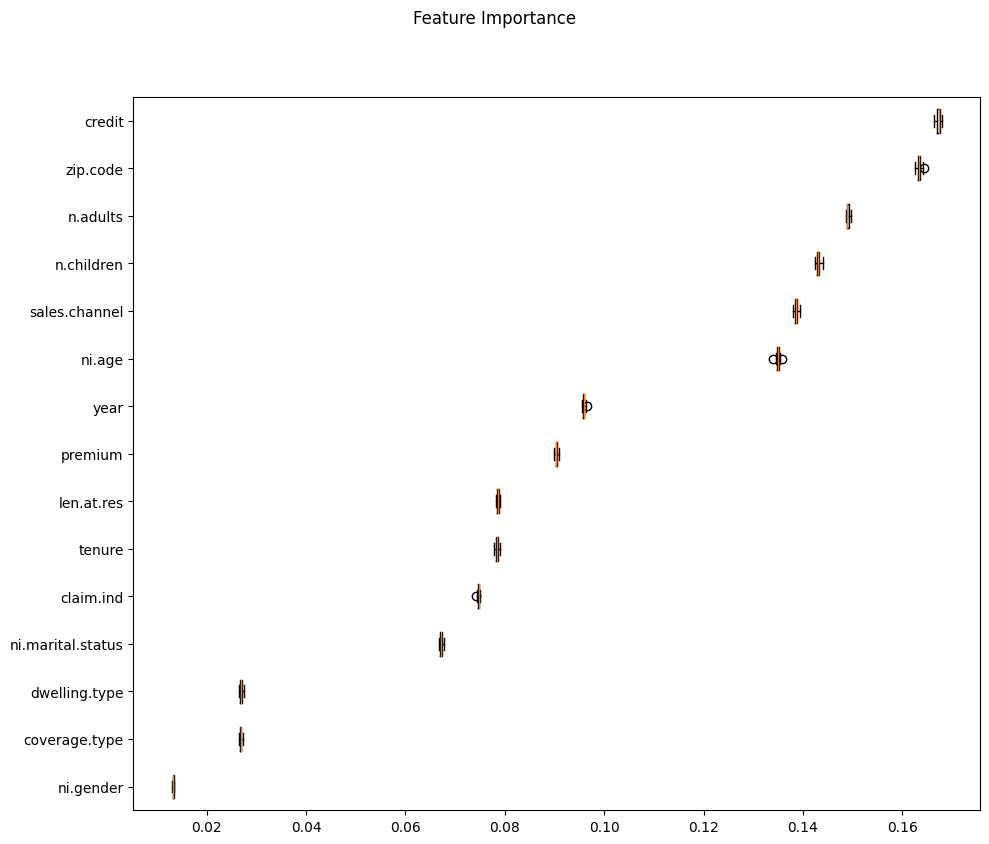

In [59]:
#Check for the prediction variable importance
from sklearn.inspection import permutation_importance

# a model object to clf!

clf = DTC 

result = permutation_importance(clf, X_train, y_train, n_repeats=20,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
fig.suptitle('Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

According to the results frm the feature importance, below five features are significant to this model. 

1. Credit
2. Zip code
3. n.adults
4. ni.children
5. sales channel



### Partial dependence plot analysis

Using partial dependence plot (PDP), I can interpret the relation between insurance cancellation and each variables. 

In [60]:
# import module for PDP (partial dependence plots)
!pip install pulp 
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 56.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3626 sha256=fc97319c4437e6665254dd087ecb5c416e93e35e15772b6acd880ffda665a221
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


In [ ]:
X_train = pd.DataFrame(X_train)
#train_pdp_df=X_train.drop('cancel', axis=1)
X_train.head()

,year,zip.code,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,2013,15056.0,0.099602,0.285728,0,0,1,0.518647,2,0,1.0,0.000000,0.083333,0.424242,0.0
1,2014,80014.0,0.113062,0.326547,2,0,1,0.358558,2,0,1.0,0.000000,0.083333,0.515152,0.0
2,2014,85002.0,0.080758,0.285728,0,0,0,0.555454,0,1,1.0,0.000000,0.000000,0.333333,1.0
3,2014,85051.0,0.104986,0.285728,0,0,1,0.563491,2,0,1.0,0.090909,0.083333,0.575758,0.0
4,2013,85077.0,0.064607,0.306138,0,1,1,0.306053,0,0,1.0,0.090909,0.166667,0.363636,0.0


#### 1. Credit

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(3, 700232)


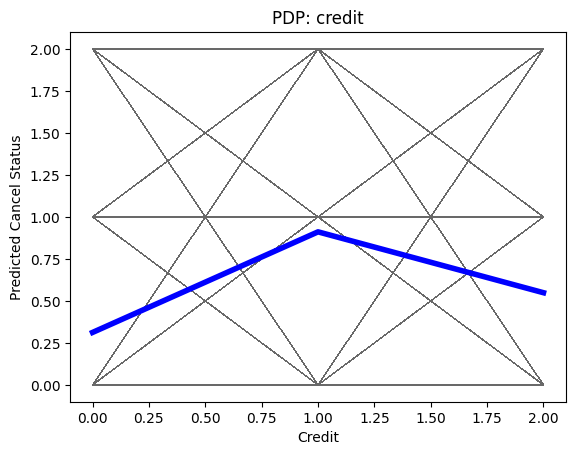

In [ ]:
tmpdf = ice(data=X_train, # ice needs a dataframe
            column='credit', # the column name
            predict=DTC.predict,
            num_grid_points=500) # the predict statement from the 
                                          # model
print(np.shape(tmpdf))
ice_plot(tmpdf, c='dimgray', linewidth=0.2,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 4, 'color':'blue'})
plt.title('PDP: credit')
plt.ylabel('Predicted Cancel Status')
plt.xlabel('Credit');
plt.show()

In this plot, a credit score of 0.0 represents high credit, 1.0 represents low credit, and 2.0 represents medium credit. A credit score of 1.0 indicates the highest cancellation rate, while 0.0 indicates the lowest and 2.0 indicates the middle. The plot suggests that lower credit scores are associated with higher cancellation rates.

#### 2. Sales Chnnel

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(3, 700232)


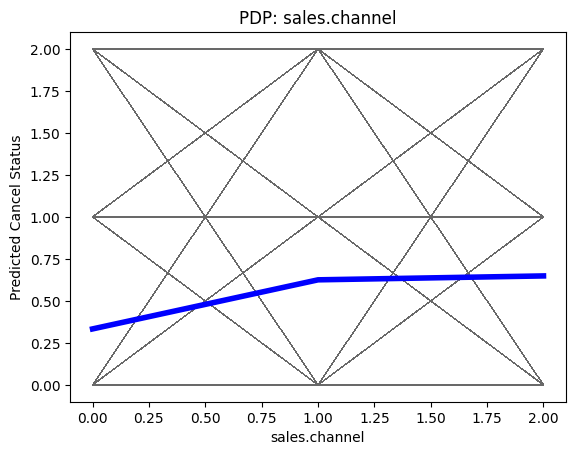

In [ ]:
tmpdf = ice(data=X_train, # ice needs a dataframe
            column='sales.channel', # the column name
            predict=DTC.predict,
            num_grid_points=300) # the predict statement from the 
                                          # model
print(np.shape(tmpdf))
ice_plot(tmpdf, c='dimgray', linewidth=0.2,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 4, 'color':'blue'})
plt.title('PDP: sales.channel')
plt.ylabel('Predicted Cancel Status')
plt.xlabel('sales.channel');
plt.show()

In the sales.channel plot, a sales channel of 0.0 represents broker, 0.5 represents online, and 1.0 represents phone. The plot suggests that sales from brokers have the lowest cancellation rate, while online sales are associated with the highest cancellation rate.

#### 3. n.adults

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(8, 700232)


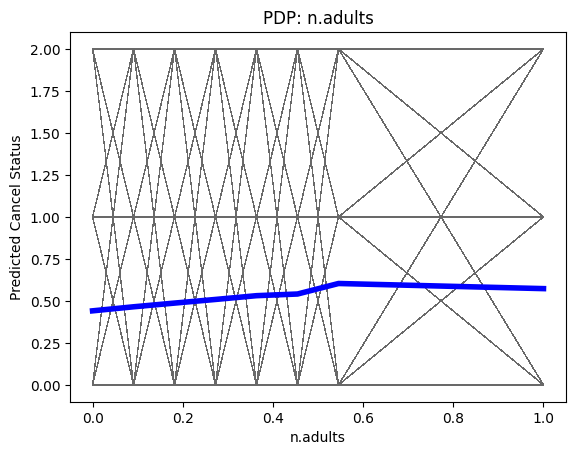

In [61]:
tmpdf = ice(data=X_train, # ice needs a dataframe
            column='n.adults', # the column name
            predict=DTC.predict,
            num_grid_points=300) # the predict statement from the 
                                          # model
print(np.shape(tmpdf))
ice_plot(tmpdf, c='dimgray', linewidth=0.2,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 4, 'color':'blue'})
plt.title('PDP: n.adults')
plt.ylabel('Predicted Cancel Status')
plt.xlabel('n.adults');
plt.show()

Regarding "n.adult", the graph shows that as the number of adults increases, the corresponding number of cancellations also increases. However, the increase is not sharp, and the graph remains relatively stable around 0.5.

#### 4. n.children

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(13, 700232)


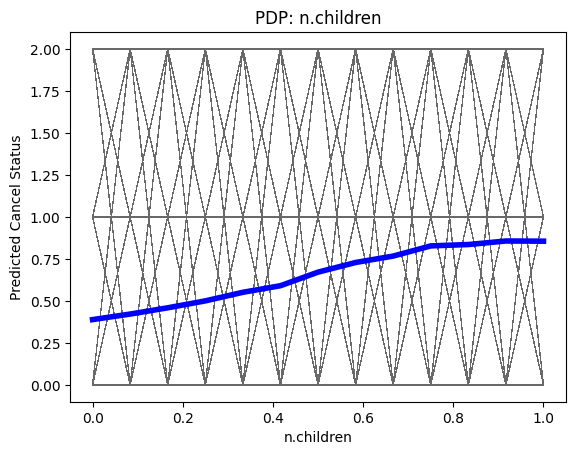

In [ ]:
tmpdf = ice(data=X_train, # ice needs a dataframe
            column='n.children', # the column name
            predict=DTC.predict,
            num_grid_points=300) # the predict statement from the 
                                          # model
print(np.shape(tmpdf))
ice_plot(tmpdf, c='dimgray', linewidth=0.2,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 4, 'color':'blue'})
plt.title('PDP: n.children')
plt.ylabel('Predicted Cancel Status')
plt.xlabel('n.children');
plt.show()

According to the n.children PDP plot, it can be interpreted that the more children in a property, the higher the number of cancellations.

#### 5. zip.code

In [ ]:
tmpdf = ice(data=X_train, 
            column='zip.code', # the column name
            predict=DTC.predict,
            num_grid_points=300) # the predict statement from the 
                                          # model
print(np.shape(tmpdf))
ice_plot(tmpdf, c='dimgray', linewidth=0.2,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 4, 'color':'blue'})
plt.title('PDP: zip.code')
plt.ylabel('Predicted Cancel Status')
plt.xlabel('zip.code');
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


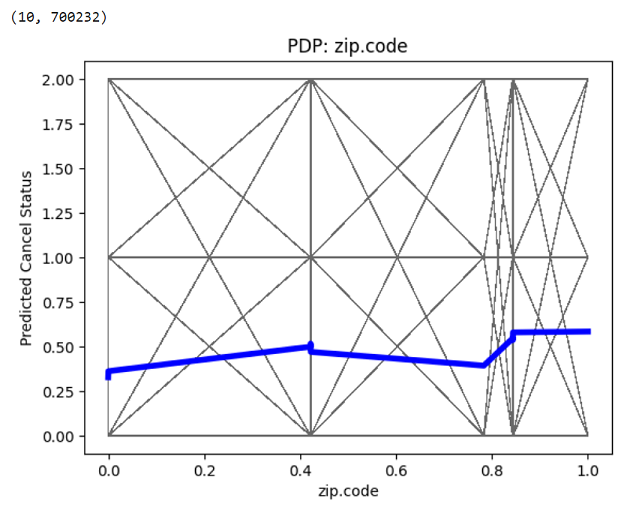

While the number of cancellations is generally stable across zip codes, certain regions tend to see more cancellations. 

## 5.Conclusion 


1. The cancel variable has three categories which are unbalanced, and hence, we used SMOTE to balance the classes.
2. After trying out different classification models, we selected the RandomForestClassifier to solve our problem as it gave giving highest test accuracy (72% of weighted F1 score) 
3. We used permutation method to find that most influential features for this classification problem are zip.code, credit, sales.channel, n.adults and n.children
4. Gender, dwelling type, coverage type and marital status were some of the least impactful variables for our model.
5. Cancel Indicator shows positive correlation with Number of children, Number of adult and claim indicator
6. To reduce the number of policy cancellations, it appears that brokers should prioritize face-to-face sales over online or phone sales. Furthermore, brokers may want to target customers with higher credit scores, and fewer children. The data also suggests that brokers should exercise caution when selling insurance in regions with a high incidence of cancellations.